# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.model_selection import train_test_split

## 1.1 Reading Data

In [5]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [6]:
project_data

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1           140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2            21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3               45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4           172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
5           141660  p154343  a50a390e8327a95b77b9e495b58b9a6e           Mrs.   
6            21147  p099819  9b40170bfa65e399981717ee8731efc3           Mrs.   
7            94142  p092424  5bfd3d12fae3d2fe88684bbac570c9d2            Ms.   
8           112489  p045029  487448f5226005d08d36bdd75f095b31           Mrs.   
9           158561  p001713  140eeac1885c820ad5592a409a3a8994            Ms.   
10           43184  p040307  363788b51d40d978fe276bcb1f8a2b35           Mrs.   
11          127083  p251806  4ba7c721133ef651ca54a03551746708            Ms.   
12           19090  p051126  5e52c92b7e3c472aad247a239d345543           Mrs.   
13           15126  p003874  178f6ae765cd4e0fb143a77c47fd65e2           Mrs.   
14           62232  p233127  424819801de22a60bba7d0f4354d0258            Ms.   
15           67303  p132832  bb6d6d054824fa01576ab38dfa2be160            Ms.   
16          127215  p174627  4ad7e280fddff889e1355cc9f29c3b89           Mrs.   
17          157771  p152491  e39abda057354c979c5b075cffbe5f88            Ms.   
18          122186  p196421  fcd9b003fc1891383f340a89da02a1a6           Mrs.   
19          146331  p058343  8e07a98deb1bc74c75b97521e05b1691            Ms.   
20           75560  p052326  e0c1aad1f71badeff703fadc15f57680           Mrs.   
21          132078  p187097  2d4a4d2d774e5c2fdd25b2ba0e7341f8           Mrs.   
22           84810  p165540  30f08fbe02eba5453c4ce2e857e88eb4            Ms.   
23            8636  p219330  258ef2e6ab5ce007ac6764ce15d261ba            Mr.   
24           21478  p126524  74f8690562c44fc88f65f845b9fe61d0           Mrs.   
25           20142  p009037  b8bf3507cee960d5fedcb27719df2d59           Mrs.   
26           33903  p040091  7a0a5de5ed94e7036946b1ac3eaa99d0            Ms.   
27            1156  p161033  efdc3cf14d136473c9f62becc00d4cec        Teacher   
28           35430  p085706  22c8184c4660f1c589bea061d14b7f35           Mrs.   
29           22088  p032018  45f16a103f1e00b7439861d4e0728a59           Mrs.   
...            ...      ...                               ...            ...   
109218      127181  p077978  91f5c69bf72c82edb9bc1f55596d8d95           Mrs.   
109219       65838  p042022  9a6784108c76576565f46446594f99c4        Teacher   
109220       21062  p064087  19c622a38a0cd76c2e9dbcc40541fabd           Mrs.   
109221       81490  p117254  031e299278ac511616b2950fc1312a55        Teacher   
109222       69138  p152194  6f6e951e435aa9dc966091945414bcc4            Ms.   
109223        5110  p041136  6db62616b4ef6efc2310088f7ea0ae14            Ms.   
109224      109630  p257774  651866d8215616f65934aafcbee21bf5            Ms.   
109225      177841  p079425  c628dff071aa8028b08a5d4972bef2a1           Mrs.   
109226       65359  p085810  1d286ff10ee3982b2b47813f1e415ef2            Ms.   
109227       55643  p146149  e15cd063caa1ce11a45f2179535105f2           Mrs.   
109228      103666  p191845  d0603199630760d8d0eb003108208998           Mrs.   
109229      121219  p055363  523f95270c6aec82bee90e3931ceeeca           Mrs.   
109230      117282  p235512  ee59900af64d9244487e7ed87d0bc423            Ms.   
109231      170085  p248898  9d7a4dae637d1a170778e2db1515e574           Mrs.   
109232       36083  p204774  c116af7435274872bea9ff123a69cf6a           Mrs.   
109233      155847  p120664  b90258ab009b84e0dc11a7186d597141            Ms.   
109234       52918  p057638  dd68d9fbae85933c0173c13f66291cbe            Ms.   
109235       69971  p105083  9636fcacbf65eb393133a94c83c4a0d4           Mrs.   
109236  

In [7]:
resource_data

id                                        description  quantity  \
0        p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1        p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2        p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3        p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4        p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   
5        p069063  Last to Finish: A Story About the Smartest Boy...         1   
6        p069063  Mrs. Gorski, I Think I Have the Wiggle Fidgets...         1   
7        p069063  See-N-Read 1503905CQ Reading Tool - Book Size,...         2   
8        p096795  Brewster WPD90218 Wall Pops Flirt Dot, Set of ...         2   
9        p096795  Brewster Wall Pops WPE99065 Peel & Stick Calyp...         2   
10       p096795  TIME For Kids - 3-4 PRINT Bundle - 24 issues /...        40   
11       p149007  Ahora, Spanish, Grades 6 - 12, Level 2 (min. 1...        60   
12       p149007  Scholastic News, Grades 5/6 (min. 10 subscript...        96   
13       p149007  Science Spin Grades 3–6 - 8 Issues / Min. 10 S...        96   
14       p236235     PP440X - Fairy Tales Problem Solving STEM Kits         2   
15       p052460  DD165AT - Calming Colors&#174; Easy-Clean Room...         1   
16       p052460  DD165SB - Calming Colors&#174; Easy-Clean Room...         1   
17       p052460  DD165SE - Calming Colors&#174; Easy-Clean Room...         1   
18       p052460  DD165SG - Calming Colors&#174; Easy-Clean Room...         1   
19       p233680          AA758BU - Connect & Store Book Bin - Blue         4   
20       p233680         AA758GR - Connect & Store Book Bin - Green         4   
21       p233680           AA758RD - Connect & Store Book Bin - Red         4   
22       p233680       AA758RG - Connect & Store Book Bin -  Orange         4   
23       p233680                 AA758VT - Connect & Store Book Bin         5   
24       p233680        AA758YE - Connect & Store Book Bin - Yellow         5   
25       p233680    JJ302 - Books On Wheels Mobile Library - 6 Bins         1   
26       p233680                 LX468BU - Extra Storage Bin - Blue         2   
27       p233680                LX468GR - Extra Storage Bin - Green         2   
28       p233680                  LX468RD - Extra Storage Bin - Red         2   
29       p233680               LX468YE - Extra Storage Bin - Yellow         2   
...          ...                                                ...       ...   
1541242  p187432  Samsung Chromebook, 11.6" Screen, 2 GB RAM, 16...         3   
1541243  p187432                   Sentry Folding Headphones, Black        10   
1541244  p187432                   Sentry Folding Headphones, White         4   
1541245  p149426  Piper Computer Kit | Educational Computer that...         1   
1541246  p238803              CARPET MY FAVORITE COLORS-7FT6INX12FT         1   
1541247  p087783                        BALL STAY N PLACE SAND FILL         2   
1541248  p087783                  BR302BU - Comfy Floor Seat - Blue         1   
1541249  p087783                   BR302RD - Comfy Floor Seat - Red         1   
1541250  p087783                   CARDINAL (PP) - CLASSROOM SELECT         3   
1541251  p087783               CF521GR - Giant Comfy Pillow - Green         1   
1541252  p087783  OPTION CLASS - CS NEOCLASS/NEOMOVE SHELL COLOR...         3   
1541253  p087783  STOOL - CS NEOROK - STOOL HEIGHT 12 - RUBBER B...         3   
1541254  p086116  Apple iPad 2 2nd generation Tablet, 1 GHz proc...         1   
1541255  p086116  Apple iPad with Retina Display MD513LL/A (16GB...        11   
1541256  p086116  ProCase iPad Case 9.7" 2017 - Vintage Folio St...         3   
1541257  p086116  iPad 2 Case, iPad 3 Case, iPad 4 Case, AiSMei ...         7   
1541258  p086116  iPad 9.7 2017 Case (New 2017 Model), EasyAcc U...         2   
1541259  p086116  iPad Mini Case, Apple iPad 

In [8]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [9]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [11]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [12]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
X = project_data
y = project_data['project_is_approved'].values
X_train, X_test, y_train, y_test=train_test_split(project_data, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv=train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [15]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
92540       32872  p184219  ea013e5658fc0fea592b4f97f00dbe5b            Ms.   
20744      173103  p023182  937c9fe9fd09d33018c80839a9c53fd5           Mrs.   

      school_state                Date project_grade_category  \
92540           CA 2017-02-13 22:57:16          Grades PreK-2   
20744           UT 2016-09-13 13:19:02             Grades 3-5   

                             project_title  \
92540  Writing Materials for Young Authors   
20744          Connecting with Chromebooks   

                                         project_essay_1  \
92540  My kindergartners are loving, curious, and eag...   
20744  We are a class of 32 smart, talented and energ...   

                                         project_essay_2 project_essay_3  \
92540  One of my favorite ways to help students pract...             NaN   
20744  Currently, we have 32 students in our classroo...             NaN   

      project_essay_4                           project_resource_summary  \
92540             NaN  My students need a class set of sturdy dry era...   
20744             NaN  My students need more Chromebooks to be able t...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
92540                                             4                    1   
20744                                             0                    1   

                     clean_categories             clean_subcategories  \
92540               Literacy_Language              Literature_Writing   
20744  Literacy_Language Math_Science  Literature_Writing Mathematics   

                                                   essay  
92540  My kindergartners are loving, curious, and eag...  
20744  We are a class of 32 smart, talented and energ...

In [16]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_tr = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_tr.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [03:26<00:00, 354.56it/s]


In [24]:
# after preprocesing
#preprocessed_essays[20000]
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay'], dtype=object)

In [25]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_te = []
# tqdm is for printing the status bar
for sentance in X_test['essay'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_te.append(sent.lower().strip())

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [26]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_project_title_tr = []
# tqdm is for printing the status bar
for sentance in X_train['project_title'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_tr.append(sent.lower().strip())

In [27]:
from tqdm import tqdm
preprocessed_project_title_te = []
# tqdm is for printing the status bar
for sentance in X_test['project_title'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_te.append(sent.lower().strip())

## 1.5 Preparing data for models

In [28]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [29]:
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_tr = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [30]:
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict_tr = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [31]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_tr.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit((X_train['clean_categories'].values))
categories_one_hot_tr=categories_one_hot.transform((X_train['clean_categories'].values))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_tr.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (73196, 9)


In [32]:

categories_one_hot_te = categories_one_hot.transform((X_test['clean_categories'].values))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_te.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (36052, 9)


In [33]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict_tr.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit((X_train['clean_subcategories'].values))
sub_categories_one_hot_tr=sub_categories_one_hot.transform((X_train['clean_subcategories'].values))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_tr.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (73196, 30)


In [34]:
sub_categories_one_hot_te = sub_categories_one_hot.transform((X_test['clean_subcategories'].values))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_te.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (36052, 30)


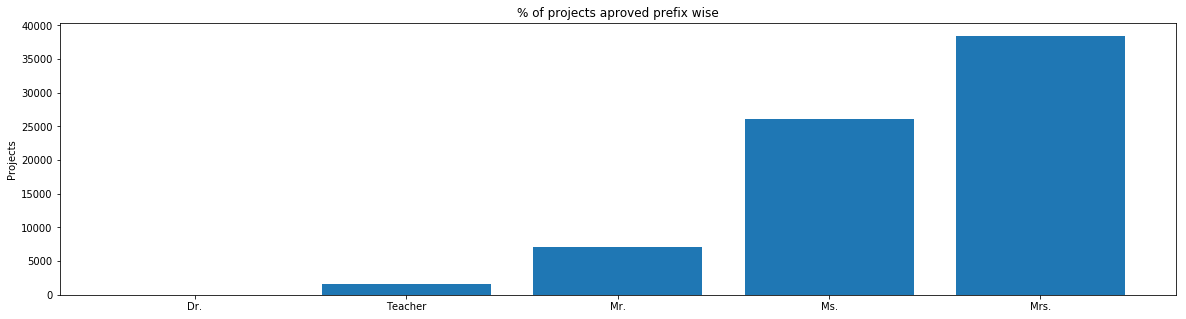

In [35]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
#teacher_prefix
#how to remove nan from string:https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
#cleanedList_teacher_prefix = [x for x in project_data['teacher_prefix'].values if x != np.nan]
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
#from math import isnan
import numpy as np
X_train = X_train.replace(np.nan, 'NA', regex=True)
#X_cv = X_cv.replace(np.nan, 'NA', regex=True)
X_test = X_test.replace(np.nan, 'NA', regex=True)

my_counter = Counter()
for word in X_train['teacher_prefix'].values:
    if word == "NA":
        continue
    my_counter[word] += 1

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_teacher_prefix = dict(my_counter)
'''cat_dict_teacher_prefix = {k:cat_dict_teacher_prefix [k] for k in cat_dict_teacher_prefix  if not isnan(k)}
cat_dict_teacher_prefix = {k: cat_dict_teacher_prefix[k] for k in cat_dict_teacher_prefix if not isnan(my_dict[k])}
'''
sorted_cat_dict_teacher_prefix = dict(sorted(cat_dict_teacher_prefix.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict_teacher_prefix))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict_teacher_prefix.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved prefix wise')
plt.xticks(ind, list(sorted_cat_dict_teacher_prefix.keys()))
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_teacher_prefix.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_tr = vectorizer.transform(X_train['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_tr.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (73196, 5)


In [37]:
teacher_prefix_one_hot_te = vectorizer.transform(X_test['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_te.shape)

Shape of matrix after one hot encodig  (36052, 5)


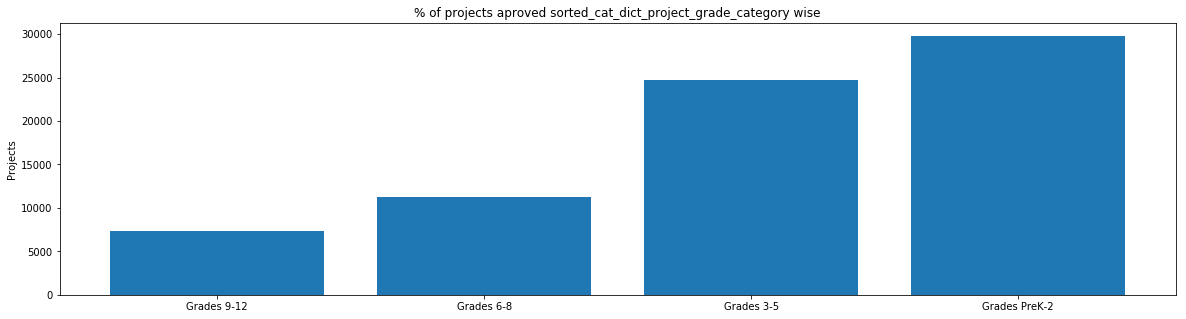

In [38]:
#project_grade_category
#how to remove nan from string:https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
#cleanedList_teacher_prefix = [x for x in project_data['teacher_prefix'].values if x != np.nan]
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
#from math import isnan
import numpy as np
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    my_counter[word] += 1

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_project_grade_category= dict(my_counter)
'''cat_dict_teacher_prefix = {k:cat_dict_teacher_prefix [k] for k in cat_dict_teacher_prefix  if not isnan(k)}
cat_dict_teacher_prefix = {k: cat_dict_teacher_prefix[k] for k in cat_dict_teacher_prefix if not isnan(my_dict[k])}
'''
sorted_cat_dict_project_grade_category = dict(sorted(cat_dict_project_grade_category.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict_project_grade_category))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict_project_grade_category.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved sorted_cat_dict_project_grade_category wise')
plt.xticks(ind, list(sorted_cat_dict_project_grade_category.keys()))
plt.show()

#type(project_data['teacher_prefix'].values[0])

In [39]:
print(sorted_cat_dict_project_grade_category.keys())
print(sorted_cat_dict_project_grade_category.values())


dict_keys(['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2'])
dict_values([7341, 11295, 24773, 29787])


# project_grade_category :categorical data

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_project_grade_category.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot_tr = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_tr.shape)

['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
Shape of matrix after one hot encodig  (73196, 4)


In [41]:
project_grade_category_one_hot_te = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_te.shape)

Shape of matrix after one hot encodig  (36052, 4)


# school_state : categorical data

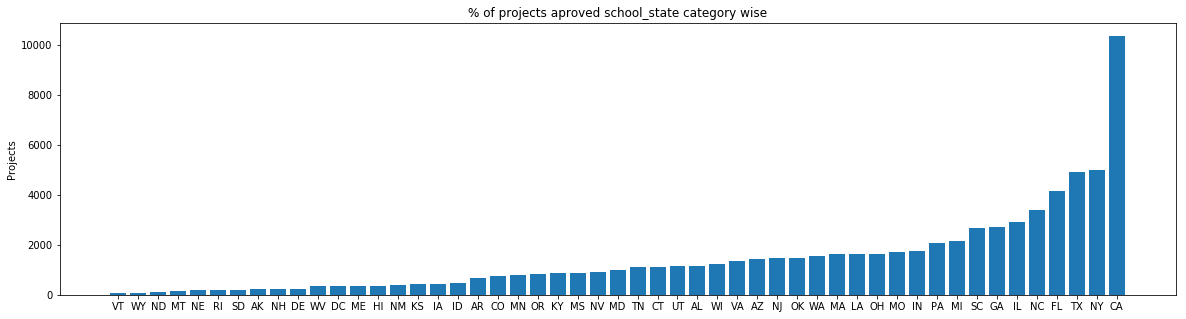

In [42]:
#project_grade_category
#how to remove nan from string:https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
#cleanedList_teacher_prefix = [x for x in project_data['teacher_prefix'].values if x != np.nan]
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
#from math import isnan
import numpy as np
my_counter = Counter()
for word in X_train['school_state'].values:
    my_counter[word] += 1

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_school_state_category= dict(my_counter)
'''cat_dict_teacher_prefix = {k:cat_dict_teacher_prefix [k] for k in cat_dict_teacher_prefix  if not isnan(k)}
cat_dict_teacher_prefix = {k: cat_dict_teacher_prefix[k] for k in cat_dict_teacher_prefix if not isnan(my_dict[k])}
'''
sorted_cat_dict_school_state_category = dict(sorted(cat_dict_school_state_category.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict_school_state_category))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict_school_state_category.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved school_state category wise')
plt.xticks(ind, list(sorted_cat_dict_school_state_category.keys()))
plt.show()

#type(project_data['teacher_prefix'].values[0])

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_school_state_category.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values.astype('U'))
print(vectorizer.get_feature_names())


school_state_category_one_hot_tr = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_category_one_hot_tr.shape)

['VT', 'WY', 'ND', 'MT', 'NE', 'RI', 'SD', 'AK', 'NH', 'DE', 'WV', 'DC', 'ME', 'HI', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'TN', 'CT', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (73196, 51)


In [44]:
school_state_category_one_hot_te = vectorizer.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_category_one_hot_te.shape)

Shape of matrix after one hot encodig  (36052, 51)


# clean_subcategories : categorical data

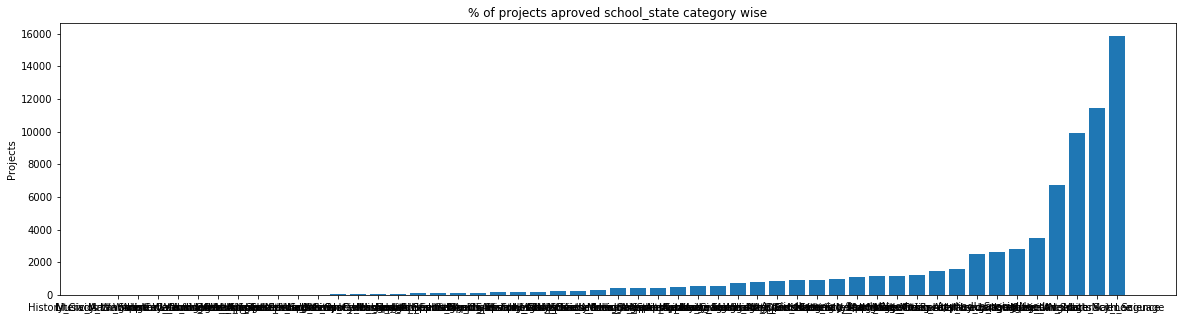

In [45]:
#project_grade_category
#how to remove nan from string:https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
#cleanedList_teacher_prefix = [x for x in project_data['teacher_prefix'].values if x != np.nan]
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
#from math import isnan
import numpy as np
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter[word] += 1

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_clean_categories_category= dict(my_counter)
'''cat_dict_teacher_prefix = {k:cat_dict_teacher_prefix [k] for k in cat_dict_teacher_prefix  if not isnan(k)}
cat_dict_teacher_prefix = {k: cat_dict_teacher_prefix[k] for k in cat_dict_teacher_prefix if not isnan(my_dict[k])}
'''
sorted_cat_dict_clean_categories_category = dict(sorted(cat_dict_clean_categories_category.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict_clean_categories_category))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict_clean_categories_category.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved school_state category wise')
plt.xticks(ind, list(sorted_cat_dict_clean_categories_category.keys()))
plt.show()

#type(project_data['teacher_prefix'].values[0])

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_clean_categories_category.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values.astype('U'))
print(vectorizer.get_feature_names())


clean_categories_category_one_hot_tr = vectorizer.transform(X_train['clean_categories'].values)
print("Shape of matrix after one hot encodig ",clean_categories_category_one_hot_tr.shape)

['History_Civics Warmth Care_Hunger', 'Music_Arts Warmth Care_Hunger', 'Literacy_Language Warmth Care_Hunger', 'Math_Science Warmth Care_Hunger', 'History_Civics Health_Sports', 'AppliedLearning Warmth Care_Hunger', 'Music_Arts AppliedLearning', 'Music_Arts Health_Sports', 'Music_Arts History_Civics', 'Health_Sports Warmth Care_Hunger', 'SpecialNeeds Warmth Care_Hunger', 'SpecialNeeds Health_Sports', 'Health_Sports History_Civics', 'History_Civics AppliedLearning', 'Literacy_Language Health_Sports', 'Music_Arts SpecialNeeds', 'Health_Sports Music_Arts', 'Health_Sports AppliedLearning', 'AppliedLearning History_Civics', 'History_Civics SpecialNeeds', 'Health_Sports Math_Science', 'SpecialNeeds Music_Arts', 'History_Civics Math_Science', 'History_Civics Music_Arts', 'Math_Science Health_Sports', 'AppliedLearning Health_Sports', 'Literacy_Language AppliedLearning', 'Math_Science History_Civics', 'Health_Sports Literacy_Language', 'AppliedLearning Music_Arts', 'Literacy_Language History_Ci

In [47]:
clean_categories_category_one_hot_te = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",clean_categories_category_one_hot_te.shape)

Shape of matrix after one hot encodig  (36052, 51)


# clean_subcategories : categorical data

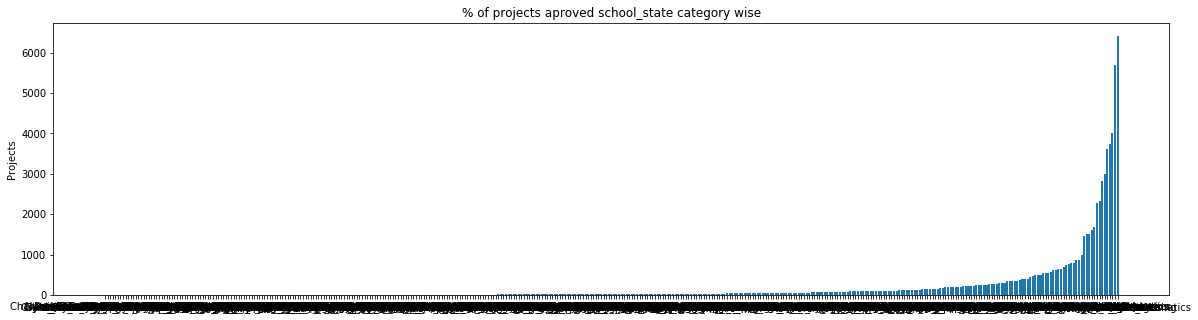

In [48]:
#project_grade_category
#how to remove nan from string:https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
#cleanedList_teacher_prefix = [x for x in project_data['teacher_prefix'].values if x != np.nan]
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
#from math import isnan
import numpy as np
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter[word] += 1

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_clean_subcategories_category= dict(my_counter)
'''cat_dict_teacher_prefix = {k:cat_dict_teacher_prefix [k] for k in cat_dict_teacher_prefix  if not isnan(k)}
cat_dict_teacher_prefix = {k: cat_dict_teacher_prefix[k] for k in cat_dict_teacher_prefix if not isnan(my_dict[k])}
'''
sorted_cat_dict_clean_subcategories_category = dict(sorted(cat_dict_clean_subcategories_category.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict_clean_subcategories_category))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict_clean_subcategories_category.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved school_state category wise')
plt.xticks(ind, list(sorted_cat_dict_clean_subcategories_category.keys()))
plt.show()

#type(project_data['teacher_prefix'].values[0])

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_clean_subcategories_category.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values.astype('U'))
print(vectorizer.get_feature_names())


clean_subcategories_category_one_hot_tr = vectorizer.transform(X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",clean_subcategories_category_one_hot_tr.shape)

['Gym_Fitness ParentInvolvement', 'CharacterEducation NutritionEducation', 'NutritionEducation SocialSciences', 'Gym_Fitness Warmth Care_Hunger', 'FinancialLiteracy Other', 'Civics_Government ParentInvolvement', 'ESL TeamSports', 'CommunityService Gym_Fitness', 'Economics Other', 'EarlyDevelopment ForeignLanguages', 'Economics NutritionEducation', 'Economics Music', 'History_Geography Warmth Care_Hunger', 'ParentInvolvement Warmth Care_Hunger', 'Civics_Government TeamSports', 'Economics ForeignLanguages', 'Civics_Government ForeignLanguages', 'Extracurricular FinancialLiteracy', 'History_Geography ParentInvolvement', 'CommunityService FinancialLiteracy', 'Economics Health_LifeScience', 'Gym_Fitness SocialSciences', 'Other Warmth Care_Hunger', 'Civics_Government NutritionEducation', 'ParentInvolvement TeamSports', 'EnvironmentalScience TeamSports', 'Health_LifeScience Warmth Care_Hunger', 'FinancialLiteracy VisualArts', 'Literature_Writing NutritionEducation', 'ESL NutritionEducation', 


Shape of matrix after one hot encodig  (73196, 395)


In [50]:
clean_subcategories_category_one_hot_te = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",clean_subcategories_category_one_hot_te.shape)

Shape of matrix after one hot encodig  (36052, 395)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [51]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_essays_tr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [52]:
X_train_essay_bow = vectorizer.transform(preprocessed_essays_tr)
#X_cv_essay_bow = vectorizer.transform(preprocessed_essays_cv)
X_test_essay_bow = vectorizer.transform(preprocessed_essays_te)

In [53]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_project_title_tr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [54]:
X_train_title_bow = vectorizer.transform(preprocessed_project_title_tr)
#X_cv_title_bow =    vectorizer.transform(preprocessed_project_title_cv)
X_test_title_bow =  vectorizer.transform(preprocessed_project_title_te)

#### 1.5.2.2 TFIDF vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_essays_tr)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [56]:
X_train_essay_tfidf = vectorizer.transform(preprocessed_essays_tr)
#X_cv_essay_tfidf = vectorizer.transform(preprocessed_essays_cv)
X_test_essay_tfidf = vectorizer.transform(preprocessed_essays_te)

In [57]:
vectorizer.fit(preprocessed_project_title_tr)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [58]:
X_train_title_tfidf = vectorizer.transform(preprocessed_project_title_tr)
#X_cv_title_tfidf =    vectorizer.transform(preprocessed_project_title_cv)
X_test_title_tfidf =  vectorizer.transform(preprocessed_project_title_te)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [59]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [60]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [61]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_tr: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tr.append(vector)

print(len(avg_w2v_vectors_tr))
print(len(avg_w2v_vectors_tr[0]))

73196
300


In [62]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_te: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_te.append(vector)

print(len(avg_w2v_vectors_te))
print(len(avg_w2v_vectors_te[0]))

36052
300


In [63]:
avg_w2v_vectors_preprocessed_project_title_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_project_title_tr: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_preprocessed_project_title_tr.append(vector)

print(len(avg_w2v_vectors_preprocessed_project_title_tr))
print(len(avg_w2v_vectors_preprocessed_project_title_tr[0]))

73196
300


In [64]:
avg_w2v_vectors_preprocessed_project_title_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_te): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_preprocessed_project_title_te.append(vector)

print(len(avg_w2v_vectors_preprocessed_project_title_te))
print(len(avg_w2v_vectors_preprocessed_project_title_te[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:03<00:00, 9950.99it/s]


36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [65]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_tr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [66]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_tr: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr.append(vector)

print(len(tfidf_w2v_vectors_tr))
print(len(tfidf_w2v_vectors_tr[0]))

73196
300


In [67]:
tfidf_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_te: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te.append(vector)

print(len(tfidf_w2v_vectors_te))
print(len(tfidf_w2v_vectors_te[0]))

36052
300


In [68]:
# Similarly you can vectorize for title also
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_project_title_tr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [69]:

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_preprocessed_project_title_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_tr): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_preprocessed_project_title_tr.append(vector)

print(len(tfidf_w2v_vectors_preprocessed_project_title_tr))
print(len(tfidf_w2v_vectors_preprocessed_project_title_tr[0]))

100%|██████████████████████████████████████████████████████████████████████████| 73196/73196 [00:16<00:00, 4375.44it/s]


73196
300


In [70]:

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_preprocessed_project_title_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_project_title_te: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_preprocessed_project_title_te.append(vector)

print(len(tfidf_w2v_vectors_preprocessed_project_title_te))
print(len(tfidf_w2v_vectors_preprocessed_project_title_te[0]))

36052
300


### 1.5.3 Vectorizing Numerical features

In [71]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')

In [72]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_tr = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean : 297.4188819061151, Standard deviation : 366.3380368423488


In [73]:
price_standardized_tr.shape

(73196, 1)

In [74]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_test = pd.merge(X_test, price_data, on='id', how='left')
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

In [75]:
price_standardized_test.shape

(36052, 1)

In [76]:
#X_price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#X_price = pd.merge(X_test, price_data, on='id', how='left')

In [77]:
#temp_price = X_price['price'].values
#temp_price[[0,1]]
#X_test['teacher_number_of_previously_posted_projects']

# quantity : numerical data

In [78]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized_tr = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [79]:
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [80]:
quantity_standardized_test.shape

(36052, 1)

# teacher_number_of_previously_posted_projects : numerical data

In [81]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_tr = quantity_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [82]:
teacher_number_of_previously_posted_projects_standardized_test = quantity_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [83]:
teacher_number_of_previously_posted_projects_standardized_test.shape

(36052, 1)

# sentiment score's of each of the essay : numerical data

In [84]:
from textblob import TextBlob

In [85]:
essay1_pol=[]
for i in range(0,X_train.shape[0]):
    essay1 = TextBlob(X_train['project_essay_1'].values[i])
    essay1_pol.append(essay1.sentiment.polarity)

In [86]:
import numpy as np
myarray = np.asarray(essay1_pol)

In [87]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay1_pol_scalar = StandardScaler()
essay1_pol_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
essay1_pol_standardized_tr = quantity_scalar.transform(myarray.reshape(-1, 1))

Mean : 16.931813213836822, Standard deviation : 26.154209779968085


In [88]:
essay1_pol=[]
for i in range(0,X_test.shape[0]):
    essay1 = TextBlob(X_train['project_essay_1'].values[i])
    essay1_pol.append(essay1.sentiment.polarity)

In [89]:
myarray = np.asarray(essay1_pol)

In [90]:
essay1_pol_standardized__test = quantity_scalar.transform(myarray.reshape(-1, 1))

In [91]:
essay1_pol_standardized__test.shape

(36052, 1)

In [92]:
X_test.shape

(36052, 20)

In [93]:
essay2_pol=[]
for i in range(0,X_train.shape[0]):
    essay2 = TextBlob(X_train['project_essay_2'].values[i])
    essay2_pol.append(essay2.sentiment.polarity)

In [94]:
myarray = np.asarray(essay2_pol)

In [95]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay2_pol_scalar = StandardScaler()
essay2_pol_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
essay2_pol_standardized_tr = quantity_scalar.transform(myarray.reshape(-1, 1))

Mean : 16.931813213836822, Standard deviation : 26.154209779968085


In [96]:
essay2_pol=[]
for i in range(0,X_test.shape[0]):
    essay2 = TextBlob(X_train['project_essay_2'].values[i])
    essay2_pol.append(essay2.sentiment.polarity)

In [97]:
myarray = np.asarray(essay2_pol)

In [98]:
essay2_pol_standardized__test = quantity_scalar.transform(myarray.reshape(-1, 1))

In [99]:
essay2_pol_standardized__test.shape

(36052, 1)

In [100]:
essay3_pol=[]
for i in range(0,X_train.shape[0]):
    essay3 = TextBlob(X_train['project_essay_3'].values[i])
    essay3_pol.append(essay3.sentiment.polarity)

In [101]:
myarray = np.asarray(essay3_pol)

In [102]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay3_pol_scalar = StandardScaler()
essay3_pol_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
essay3_pol_standardized_tr = quantity_scalar.transform(myarray.reshape(-1, 1))

Mean : 16.931813213836822, Standard deviation : 26.154209779968085


In [103]:
essay3_pol=[]
for i in range(0,X_test.shape[0]):
    essay3 = TextBlob(X_train['project_essay_3'].values[i])
    essay3_pol.append(essay3.sentiment.polarity)

In [104]:
myarray = np.asarray(essay3_pol)

In [105]:
essay3_pol_standardized__test = quantity_scalar.transform(myarray.reshape(-1, 1))

In [106]:
essay3_pol_standardized__test.shape

(36052, 1)

In [107]:
essay4_pol=[]
for i in range(0,X_train.shape[0]):
    essay4 = TextBlob(X_train['project_essay_4'].values[i])
    essay4_pol.append(essay4.sentiment.polarity)

In [108]:
myarray = np.asarray(essay4_pol)

In [109]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay4_pol_scalar = StandardScaler()
essay4_pol_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
essay4_pol_standardized_tr = quantity_scalar.transform(myarray.reshape(-1, 1))

Mean : 16.931813213836822, Standard deviation : 26.154209779968085


In [110]:
essay4_pol=[]
for i in range(0,X_test.shape[0]):
    essay4 = TextBlob(X_train['project_essay_4'].values[i])
    essay4_pol.append(essay3.sentiment.polarity)

In [111]:
myarray = np.asarray(essay4_pol)

In [112]:
essay4_pol_standardized__test = quantity_scalar.transform(myarray.reshape(-1, 1))

In [113]:
essay4_pol_standardized__test.shape

(36052, 1)

# number of words in the title : numerical data

In [114]:
count_project_title = []
for i in range(0,X_train.shape[0]):
    count = 0
    for word in X_train['project_title'].values[i].split(' '):
        count += 1
    count_project_title.append(count)

In [115]:
myarray = np.asarray(count_project_title)

In [116]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

count_project_title_scalar = StandardScaler()
count_project_title_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
count_project_title_tr = count_project_title_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [117]:
count_project_title = []
for i in range(0,X_test.shape[0]):
    count = 0
    for word in X_test['project_title'].values[i].split(' '):
        count += 1
    count_project_title.append(count)

In [118]:
myarray = np.asarray(count_project_title)

In [119]:
count_project_title_test = quantity_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



# number of words in the combine essays : numerical data

In [120]:
count_project_essay_1 = []
for i in range(0,X_train.shape[0]):
    count = 0
    for word in X_train['project_essay_1'].values[i].split(' '):
        count += 1
    count_project_essay_1.append(count)

In [121]:
myarray = np.asarray(count_project_essay_1)

In [122]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

count_project_essay_1_scalar = StandardScaler()
count_project_essay_1_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
count_project_essay_1_tr = count_project_essay_1_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [123]:
count_project_essay_1 = []
for i in range(0,X_test.shape[0]):
    count = 0
    for word in X_test['project_essay_1'].values[i].split(' '):
        count += 1
    count_project_essay_1.append(count)

In [124]:
myarray = np.asarray(count_project_essay_1)

In [125]:
count_project_essay_1_test = quantity_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [126]:
count_project_essay_2 = []
for i in range(0,X_train.shape[0]):
    count = 0
    for word in X_train['project_essay_2'].values[i].split(' '):
        count += 1
    count_project_essay_2.append(count)

In [127]:
myarray = np.asarray(count_project_essay_2)

In [128]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

count_project_essay_2_scalar = StandardScaler()
count_project_essay_2_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
count_project_essay_2_tr = count_project_essay_1_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [129]:
count_project_essay_2 = []
for i in range(0,X_test.shape[0]):
    count = 0
    for word in X_test['project_essay_2'].values[i].split(' '):
        count += 1
    count_project_essay_2.append(count)

In [130]:
myarray = np.asarray(count_project_essay_2)

In [131]:
count_project_essay_2_test = quantity_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [132]:
count_project_essay_3 = []
for i in range(0,X_train.shape[0]):
    count = 0
    for word in X_train['project_essay_3'].values[i].split(' '):
        count += 1
    count_project_essay_3.append(count)

In [133]:
myarray = np.asarray(count_project_essay_3)

In [134]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

count_project_essay_3_scalar = StandardScaler()
count_project_essay_3_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
count_project_essay_3_tr = count_project_essay_1_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [135]:
count_project_essay_3 = []
for i in range(0,X_test.shape[0]):
    count = 0
    for word in X_test['project_essay_3'].values[i].split(' '):
        count += 1
    count_project_essay_3.append(count)

In [136]:
myarray = np.asarray(count_project_essay_3)

In [137]:
count_project_essay_3_test = quantity_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [138]:
count_project_essay_4 = []
for i in range(0,X_train.shape[0]):
    count = 0
    for word in X_train['project_essay_4'].values[i].split(' '):
        count += 1
    count_project_essay_4.append(count)

In [139]:
myarray = np.asarray(count_project_essay_4)

In [140]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

count_project_essay_4_scalar = StandardScaler()
count_project_essay_4_scalar.fit(myarray.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
count_project_essay_4_tr = count_project_essay_1_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 16.931813213836822, Standard deviation : 26.154209779968085


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [141]:
count_project_essay_4 = []
for i in range(0,X_test.shape[0]):
    count = 0
    for word in X_test['project_essay_4'].values[i].split(' '):
        count += 1
    count_project_essay_4.append(count)

In [142]:
myarray = np.asarray(count_project_essay_4)

In [143]:
count_project_essay_4_test = quantity_scalar.transform(myarray.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [144]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [145]:
print(categories_one_hot_tr.shape)
print(sub_categories_one_hot_tr.shape)

print(price_standardized_tr.shape)

(73196, 9)
(73196, 30)
(73196, 1)


In [146]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X1_tr = hstack((categories_one_hot_tr, sub_categories_one_hot_tr, price_standardized_tr,project_grade_category_one_hot_tr,teacher_prefix_one_hot_tr))
X1_tr.shape

(73196, 49)

In [147]:
X1_te = hstack((categories_one_hot_te, sub_categories_one_hot_te, price_standardized_test,project_grade_category_one_hot_te,teacher_prefix_one_hot_te))
X1_te.shape

(36052, 49)

# Assignment 8

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2.Decision tree </h1>

### 2.4.1 Applying DT on BOW,<font color='red'> SET 1</font>

In [339]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow ,X1_tr)).tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow ,X1_te)).tocsr()

In [240]:
'''X_tr = X_tr[0:30000,:]
y_train = y_train[0:30000]
X_te = X_te[0:20000,:]
y_test = y_test[0:20000]'''

'X_tr = X_tr[0:30000,:]\ny_train = y_train[0:30000]\nX_te = X_te[0:20000,:]\ny_test = y_test[0:20000]'

In [340]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)


Final Data matrix
(73196, 10049) (73196,)
(36052, 10049) (36052,)


In [341]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}]
model =  DecisionTreeClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

'''plt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label='Train AUCCUARCY')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label='CV AUCCURACY')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label='Train AUC points')
plt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ACCURACY PLT")
plt.grid()
plt.show()
print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)'''


'plt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label=\'Train AUCCUARCY\')\n# this code is copied from here: https://stackoverflow.com/a/48803361/4084039\nplt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color=\'darkblue\')\n\nplt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label=\'CV AUCCURACY\')\n# this code is copied from here: https://stackoverflow.com/a/48803361/4084039\nplt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color=\'darkorange\')\n\nplt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label=\'Train AUC points\')\nplt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label=\'CV AUC points\')\n\n\nplt.legend()\nplt.xlabel("Alpha: hyperparameter")\nplt.ylabel("AUC")\nplt.title("ACCURACY PLT")\nplt.grid()\nplt.show()\nprint(clf.best_estimator_)\nprint(clf.score(X_tr, y_train))\nprint(clf.best_params_)'

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6901102181415799
{'max_depth': 10, 'min_samples_split': 500}


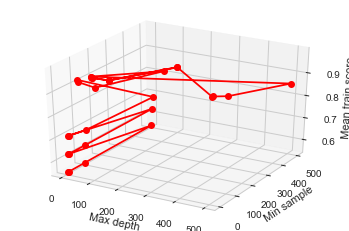

In [243]:
print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



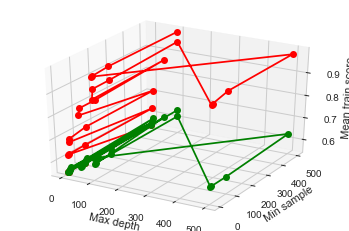

In [342]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


In [196]:
clf.cv_results_['param_max_depth'].data

array([1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 50, 50, 50, 50, 100, 100,
       100, 100, 500, 500, 500, 500, 100, 100, 100, 100], dtype=object)

From above the best value of hyper parameter 'max_depth': 10, 'min_samples_split': 500.

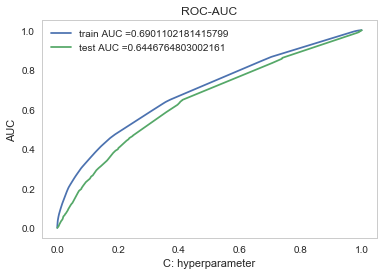

In [244]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .69 which is very high.
2. And test AUC = .645 which is much better than .5 i.e. a random model.

In [163]:
C1 = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
C1.fit(preprocessed_essays_tr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [164]:
C2 = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
C2.fit(preprocessed_project_title_tr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [165]:
f1 = C1.get_feature_names()
f2 = C2.get_feature_names()
F=f1+f2+['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']+['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']+['Price']+['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']+[ 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']

In [245]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Kashif/Anaconda3/Library/bin/graphviz'
from sklearn import tree
dot_data = tree.export_graphviz(neigh, out_file=None,max_depth = 3,feature_names= F) 
graph = graphviz.Source(dot_data) 
graph.render("first") 

'first.pdf'

<img src="first1.PNG">


In [248]:
import seaborn as sns
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)),np.argmax(tpr*(1-fpr)), "for threshold",threshould[np.argmax(tpr*(1-fpr))], np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [249]:
#ax = sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d")

the maximum value of tpr*(1-fpr) 0.41033045198382145 50 for threshold 0.49514608962347306 0.495


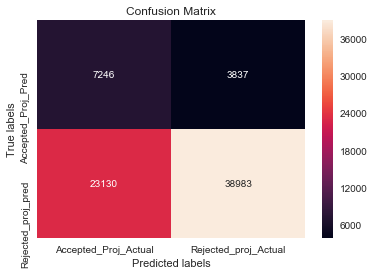

In [250]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.3809706884051643 60 for threshold 0.4023351374993171 0.402


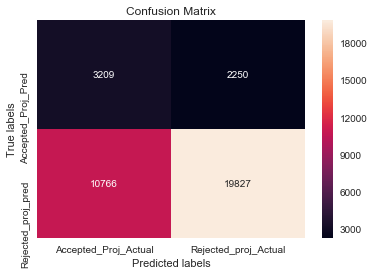

In [251]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

### TN = 3209 < FN = 10766, majority of the negative points are classified as +ve points.
### FP = 2250 < Tp = 19827 +ve points are classified more accurately.

# Computing FPR

1. Compute the predicted values and identify all those words whose actual label is rejected but misclassified as accepted.
2. Map the indices of FPR into its corresponding words.
3. Use these words for word cloud and box plots.

In [252]:
#ax = sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d")
tr_thresholds
Y = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)

the maximum value of tpr*(1-fpr) 0.3809706884051643 60 for threshold 0.4023351374993171 0.402


In [253]:
len(test_fpr)
len(y_train_pred)
Y
FP = []
for i in range(len(Y)):
    if Y[i] == 1 and y_train[i] == 0:
        FP.append(i)

In [254]:
word = []
temp1 = []
for i in FP:
    temp = []
    index = 0
    for j in range(10049):
        #index = 0
        val = int(X_te[i,j])
        if val != 0:
            temp.append(index)
        #temp.append(val)
        index = index + 1
    #word.append(F[temp])
    #print(temp)
    for k in temp:
        word.append(F[k])
    

        

In [255]:
word[:]
str1 = ''.join(word)

<class 'str'>


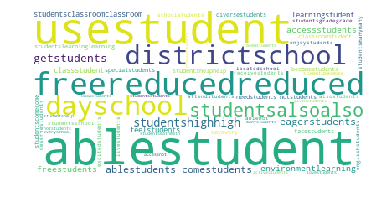

In [256]:
from wordcloud import WordCloud
print(type(word[0]))
cloud = WordCloud(background_color="white").generate(str1)
plt.imshow(cloud)
plt.axis('off')
plt.show()

The words which are misclassfied appear in larger size in above word cloud.

In [257]:
X_price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
temp_price = X_price['price'].values
temp_price[FP]

array([130.62, 296.99, 135.98, ..., 479.  , 493.82,  67.58])

Text(0,0.5,'price')

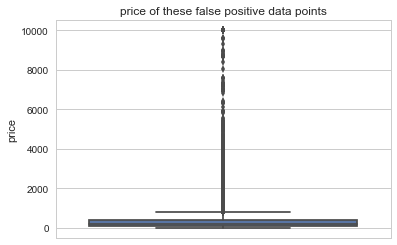

In [258]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = price_standardized_test[FP]
ax = sns.boxplot(y=temp_price)
plt.title('price of these false positive data points')
plt.ylabel('price')

From above box plot its clear that the most of the projects which are misclassified as accepted have less cost

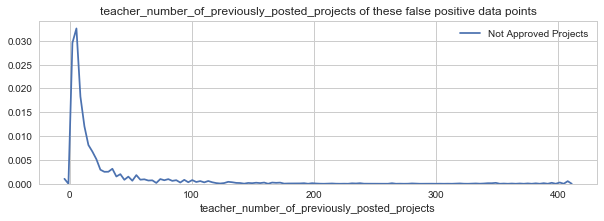

In [259]:
#Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

plt.figure(figsize=(10,3))
#sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(X_test['teacher_number_of_previously_posted_projects'][FP], hist=False, label="Not Approved Projects")
plt.title('teacher_number_of_previously_posted_projects of these false positive data points')
#plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

From above PDF its clear that teachers who have posted very few projects in the past are misclassified. 

### 2.4.2 Applying DT on TFIDF,<font color='red'> SET 2</font>

In [334]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf ,X1_tr)).tocsr()

X_te = hstack((X_test_essay_tfidf ,X_test_title_tfidf  ,X1_te)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10049) (73196,)
(36052, 10049) (36052,)


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6986985511190461
{'max_depth': 10, 'min_samples_split': 500}


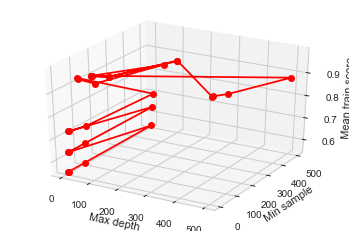

In [335]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}]
model =  DecisionTreeClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



From the above  the best value of 'max_depth': 10, 'min_samples_split': 500.

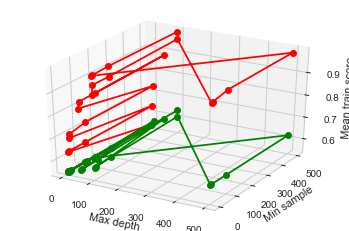

In [336]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


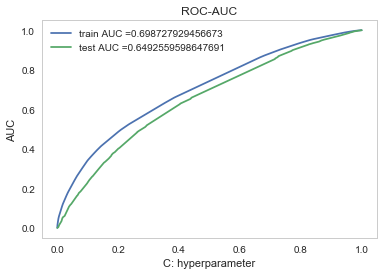

In [262]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.tree import DecisionTreeClassifier
neigh = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .67 which is very high.
2. And test AUC = .69 which is much better than .65 i.e. a random model.

In [263]:
#ax = sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d")
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Kashif/Anaconda3/Library/bin/graphviz'
from sklearn import tree
dot_data = tree.export_graphviz(neigh, out_file=None,max_depth = 3,feature_names= F) 
graph = graphviz.Source(dot_data) 
graph.render("second") 

'second.pdf'

<img src="second1.PNG">

the maximum value of tpr*(1-fpr) 0.4088697164116943 47 for threshold 0.477821750556246 0.478


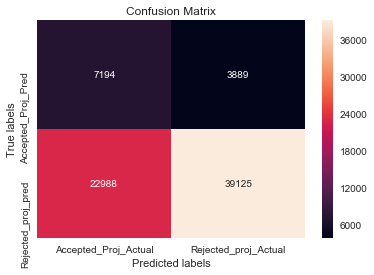

In [264]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

In [265]:
#ax = sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d")

the maximum value of tpr*(1-fpr) 0.37460481266593637 49 for threshold 0.4715046627186713 0.472


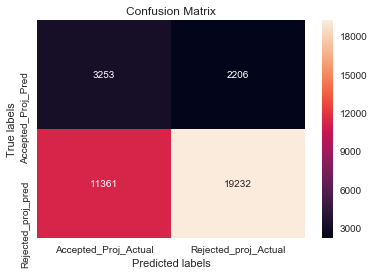

In [266]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

### TN = 3253 < FN = 11361, majority of the negative points are classified as +ve points.
### FP = 2206 < Tp = 19232, +ve points are classified more accurately.

In [267]:
#ax = sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d")
tr_thresholds
Y = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
len(test_fpr)
len(y_train_pred)
Y
FP = []
for i in range(len(Y)):
    if Y[i] == 1 and y_train[i] == 0:
        FP.append(i)

the maximum value of tpr*(1-fpr) 0.37460481266593637 49 for threshold 0.4715046627186713 0.472


In [268]:
word = []
temp1 = []
for i in FP:
    temp = []
    index = 0
    for j in range(10049):
        #index = 0
        val = int(X_te[i,j])
        if val != 0:
            temp.append(index)
        #temp.append(val)
        index = index + 1
    #word.append(F[temp])
    #print(temp)
    for k in temp:
        word.append(F[k])
    

        

In [269]:
word[:]
str1 = ''.join(word)

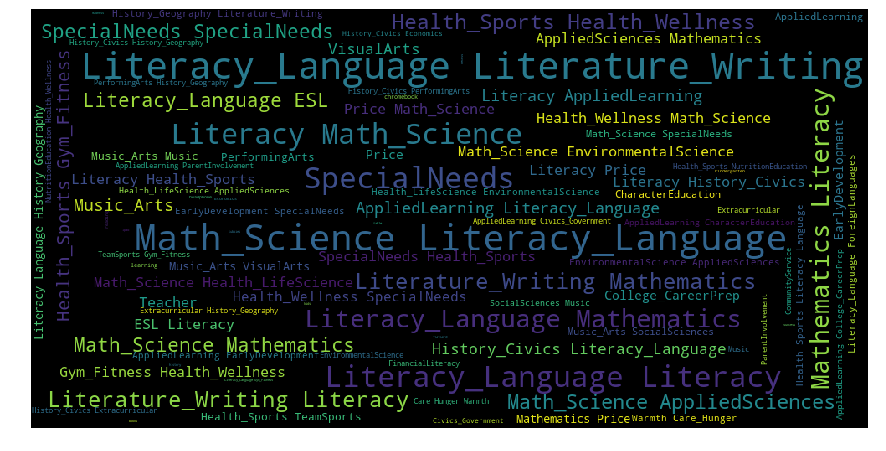

In [270]:
unique_string=(" ").join(word)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [271]:
len(str1)

130167

In [272]:
X_price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
temp_price = X_price['price'].values
temp_price[FP]

array([130.62, 296.99, 135.98, ..., 479.  , 493.82,  67.58])

Text(0,0.5,'price')

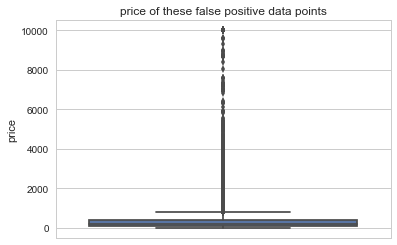

In [273]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = price_standardized_test[FP]
ax = sns.boxplot(y=temp_price)
plt.title('price of these false positive data points')
plt.ylabel('price')

From above box plot its clear that the most of the projects which are misclassified as accepted have less cost.

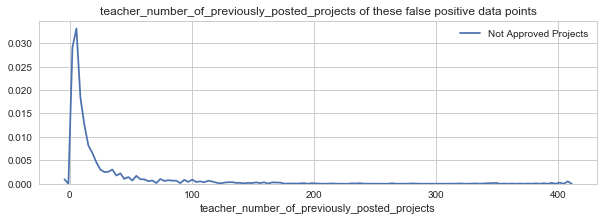

In [274]:
#Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

plt.figure(figsize=(10,3))
#sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(X_test['teacher_number_of_previously_posted_projects'][FP], hist=False, label="Not Approved Projects")
plt.title('teacher_number_of_previously_posted_projects of these false positive data points')
#plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

From above PDF its clear that teachers who have posted very few projects in the past are misclassified. 

## Select 5k best features from features of Set 2 

In [275]:
imp = neigh.feature_importances_.argsort()
imp = imp[10049-5000:10049]
imp

array([ 1668,  1669,  1670, ...,   692,  2725, 10039], dtype=int64)

In [276]:
X_te[:,imp].shape

(36052, 5000)

In [277]:
X_te_imp = X_te[:,imp]
X_tr_imp = X_tr[:,imp]

In [278]:
#y_tr_imp = y_train[imp]
#y_te_imp = y_test[imp]

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6986434137143719
{'max_depth': 10, 'min_samples_split': 500}


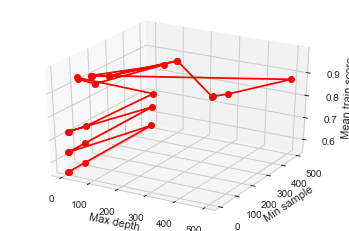

In [337]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}]
model =  DecisionTreeClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr_imp, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr_imp, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



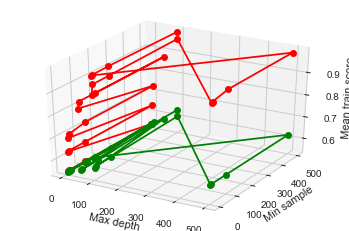

In [338]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


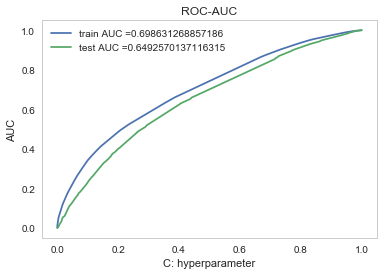

In [280]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr_imp, y_train)
y_train_pred = neigh.predict_proba(X_tr_imp)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te_imp)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


From the above test AUC is 0.65 which is > 0.5 hence better than random model

In [281]:
#ax = sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d")
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Kashif/Anaconda3/Library/bin/graphviz'
from sklearn import tree
dot_data = tree.export_graphviz(neigh, out_file=None,max_depth = 3,feature_names= np.take(F, imp)) 
graph = graphviz.Source(dot_data) 
graph.render("third") 

'third.pdf'

<img src="third1.PNG">

the maximum value of tpr*(1-fpr) 0.40868749489022255 48 for threshold 0.477821750556246 0.478


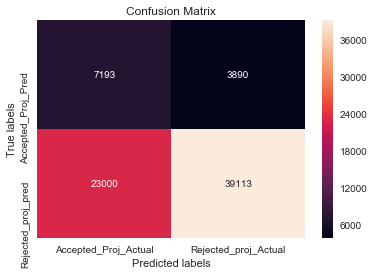

In [282]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.3746615168124471 50 for threshold 0.4715046627186713 0.472


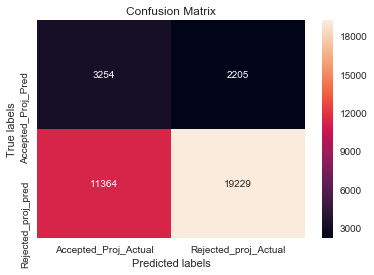

In [283]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

In [284]:
#ax = sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d")
tr_thresholds
Y = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
len(test_fpr)
len(y_train_pred)
Y
FP = []
for i in range(len(Y)):
    if Y[i] == 1 and y_train[i] == 0:
        FP.append(i)

the maximum value of tpr*(1-fpr) 0.3746615168124471 50 for threshold 0.4715046627186713 0.472


In [285]:
word = []
temp1 = []
for i in FP:
    temp = []
    index = 0
    for j in range(10049):
        #index = 0
        val = int(X_te[i,j])
        if val != 0:
            temp.append(index)
        #temp.append(val)
        index = index + 1
    #word.append(F[temp])
    #print(temp)
    for k in temp:
        word.append(F[k])
    

        

In [286]:
word[:]
str1 = ''.join(word)

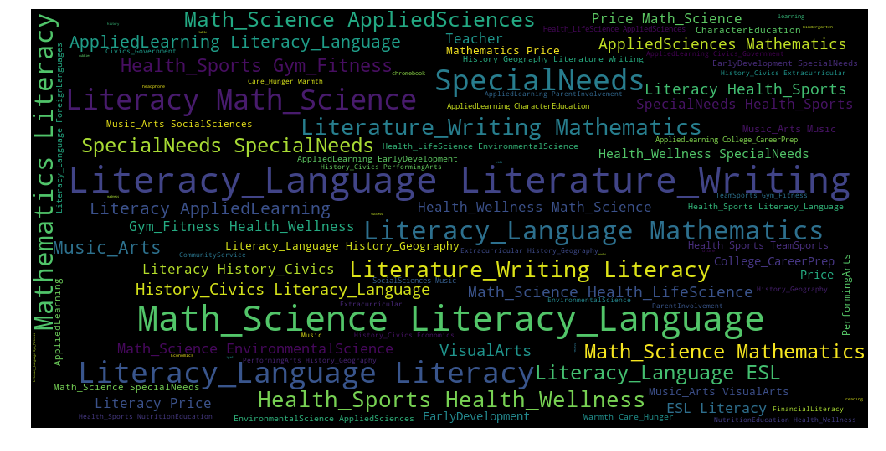

In [287]:
unique_string=(" ").join(word)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [288]:
X_price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
temp_price = X_price['price'].values
temp_price[FP]

array([130.62, 296.99, 135.98, ..., 479.  , 493.82,  67.58])

Text(0,0.5,'price')

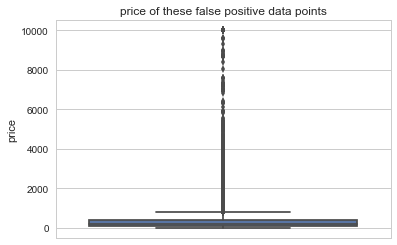

In [289]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = price_standardized_test[FP]
ax = sns.boxplot(y=temp_price)
plt.title('price of these false positive data points')
plt.ylabel('price')


From above box plot its clear that the most of the projects which are misclassified as accepted have less cost.

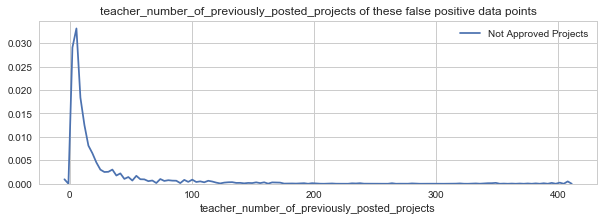

In [290]:
#Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

plt.figure(figsize=(10,3))
#sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(X_test['teacher_number_of_previously_posted_projects'][FP], hist=False, label="Not Approved Projects")
plt.title('teacher_number_of_previously_posted_projects of these false positive data points')
#plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

From above PDF its clear that teachers who have posted very few projects in the past are misclassified. 

From the above its clear that by just selecting 5k important features gives the same results as having all the features

# SET 3

In [329]:
from scipy.sparse import hstack
X_tr = hstack((avg_w2v_vectors_tr,avg_w2v_vectors_preprocessed_project_title_tr ,X1_tr)).tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = hstack((avg_w2v_vectors_te,avg_w2v_vectors_preprocessed_project_title_te ,X1_te)).tocsr()

In [330]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 649) (73196,)
(36052, 649) (36052,)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6528381061164585
{'max_depth': 5, 'min_samples_split': 500}


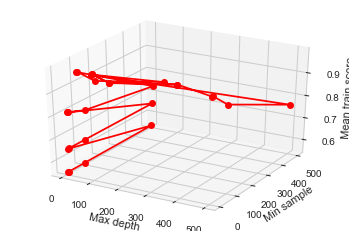

In [331]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}]
model =  DecisionTreeClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



From above  best value of hyper parameter'max_depth': 5, 'min_samples_split': 500.

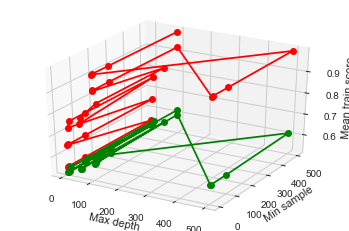

In [333]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


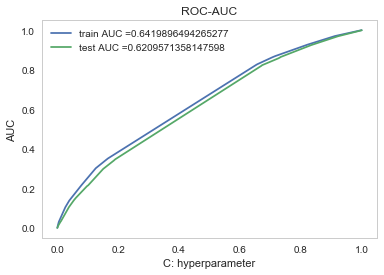

In [332]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr_imp, y_train)
y_train_pred = neigh.predict_proba(X_tr_imp)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te_imp)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .635 which is very high.
2. And test AUC = .693 which is much better than .62 i.e. a random model.

the maximum value of tpr*(1-fpr) 0.2921294967198056 13 for threshold 0.5469393062888797 0.547


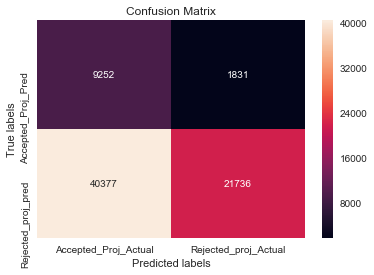

In [295]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.2803319775693246 13 for threshold 0.5469393062888797 0.547


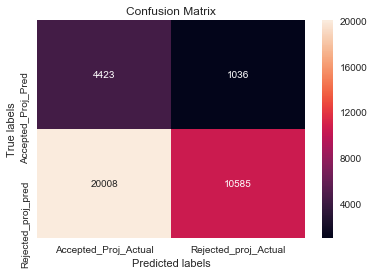

In [296]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

In [297]:
#ax = sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d")
tr_thresholds
Y = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
len(test_fpr)
len(y_train_pred)
Y
FP = []
for i in range(len(Y)):
    if Y[i] == 1 and y_train[i] == 0:
        FP.append(i)

the maximum value of tpr*(1-fpr) 0.2803319775693246 13 for threshold 0.5469393062888797 0.547


In [298]:
X_price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
temp_price = X_price['price'].values
temp_price[FP]

array([ 296.99,  135.98,  474.05, ...,  141.4 , 1224.11,  493.82])

Text(0,0.5,'price')

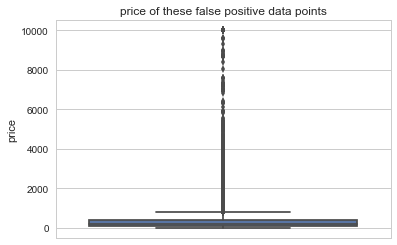

In [299]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = price_standardized_test[FP]
ax = sns.boxplot(y=temp_price)
plt.title('price of these false positive data points')
plt.ylabel('price')

From above box plot its clear that the most of the projects which are misclassified as accepted have less cost.

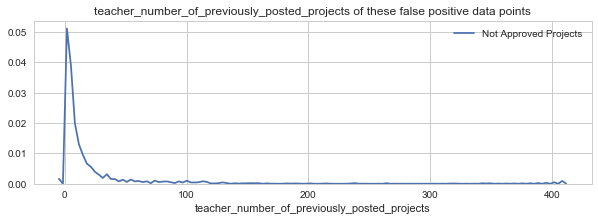

In [300]:
#Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

plt.figure(figsize=(10,3))
#sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(X_test['teacher_number_of_previously_posted_projects'][FP], hist=False, label="Not Approved Projects")
plt.title('teacher_number_of_previously_posted_projects of these false positive data points')
#plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

From above PDF its clear that teachers who have posted very few projects in the past are misclassified. 

# Task 4

In [301]:
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_tr,tfidf_w2v_vectors_preprocessed_project_title_tr ,X1_tr)).tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = hstack((tfidf_w2v_vectors_te,tfidf_w2v_vectors_preprocessed_project_title_te ,X1_te)).tocsr()

In [302]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 649) (73196,)
(36052, 649) (36052,)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.656386563774869
{'max_depth': 5, 'min_samples_split': 100}


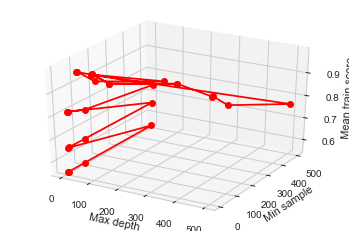

In [303]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}]
model =  DecisionTreeClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



In [325]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()

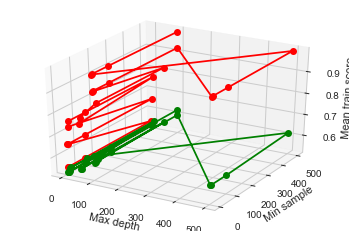

In [326]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


From above  best value of hyper parameter 'max_depth': 5, 'min_samples_split': 100.

In [322]:
#type(clf.cv_results_['mean_train_score'])
#print(clf.cv_results_['mean_train_score'].sort())
#clf.cv_results_['mean_train_score'].tolist().sort()
clf.cv_results_['mean_train_score']

array([0.5497277 , 0.5497277 , 0.5497277 , 0.5497277 , 0.65981413,
       0.66055641, 0.66086152, 0.66086152, 0.74348493, 0.76823187,
       0.76827347, 0.76827648, 0.76828843, 0.79225875, 0.82009888,
       0.82151638, 0.9235957 , 0.92521028, 0.92524841, 0.92601126,
       0.99891358, 0.99950358, 0.99951387, 0.99951739, 0.9996228 ,
       0.99997404, 0.99997576, 0.9999763 ])

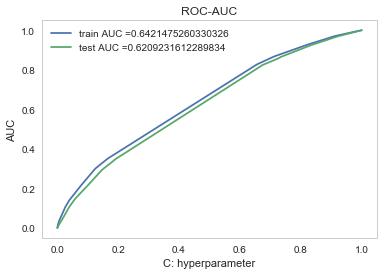

In [304]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh = DecisionTreeClassifier(max_depth = 5, min_samples_split = 100,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr_imp, y_train)
y_train_pred = neigh.predict_proba(X_tr_imp)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te_imp)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .63 which is very high.
2. And test AUC = .701 which is much better than .62 i.e. a random model.

the maximum value of tpr*(1-fpr) 0.29277443432213546 14 for threshold 0.5469393062888797 0.547


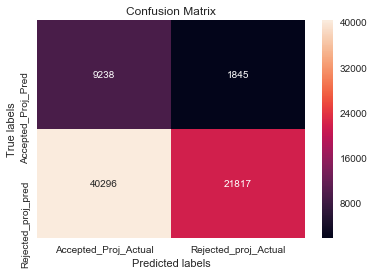

In [305]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.2807611267651613 14 for threshold 0.5469393062888797 0.547


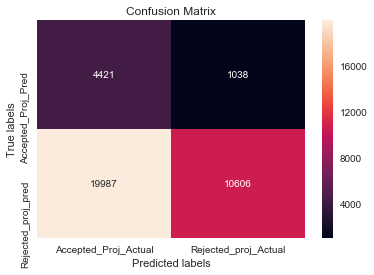

In [306]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

### TN = 4421 < FN = 19987, majority of the negative points are classified as +ve points.
### FP = 1038 < Tp = 10606, +ve points are classified more accurately.

In [307]:
#ax = sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), annot=True, fmt="d")
tr_thresholds
Y = predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
len(test_fpr)
len(y_train_pred)
Y
FP = []
for i in range(len(Y)):
    if Y[i] == 1 and y_train[i] == 0:
        FP.append(i)

the maximum value of tpr*(1-fpr) 0.2807611267651613 14 for threshold 0.5469393062888797 0.547


In [308]:
X_price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
temp_price = X_price['price'].values
temp_price[FP]

array([ 296.99,  135.98,  474.05, ...,  141.4 , 1224.11,  493.82])

Text(0,0.5,'price')

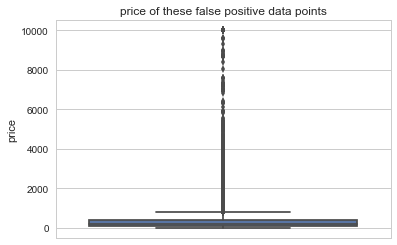

In [309]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = price_standardized_test[FP]
ax = sns.boxplot(y=temp_price)
plt.title('price of these false positive data points')
plt.ylabel('price')

From above box plot its clear that the most of the projects which are misclassified as accepted have less cost.

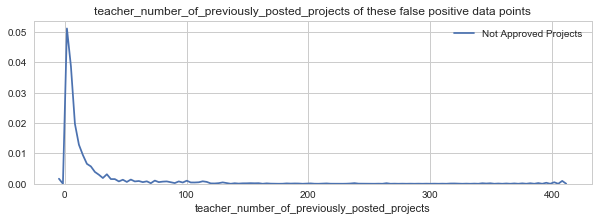

In [310]:
#Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

plt.figure(figsize=(10,3))
#sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(X_test['teacher_number_of_previously_posted_projects'][FP], hist=False, label="Not Approved Projects")
plt.title('teacher_number_of_previously_posted_projects of these false positive data points')
#plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

From above PDF its clear that teachers who have posted very few projects in the past are misclassified.

<h1>3. Conclusions</h1>

In [311]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["vectorizer", "Model", "Max_depth ","Min_samples_split", "AUC"]

x.add_row(["BOW", "DT",10,500, 0.645])
x.add_row(["TFIDF", "DT", 10,500, 0.65])
x.add_row(["TFIDF 5K Features", "DT", 10,500, 0.65])
x.add_row(["AVG W2V", "DT", 5,500, 0.62])
x.add_row(["TFIDF W2V", "DT", 5,100, 0.62])



print(x)

+-------------------+-------+------------+-------------------+-------+
|     vectorizer    | Model | Max_depth  | Min_samples_split |  AUC  |
+-------------------+-------+------------+-------------------+-------+
|        BOW        |   DT  |     10     |        500        | 0.645 |
|       TFIDF       |   DT  |     10     |        500        |  0.65 |
| TFIDF 5K Features |   DT  |     10     |        500        |  0.65 |
|      AVG W2V      |   DT  |     5      |        500        |  0.62 |
|     TFIDF W2V     |   DT  |     5      |        100        |  0.62 |
+-------------------+-------+------------+-------------------+-------+
